# Análise do filtro RC passa-baixa com circuito integrador

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.fft import fft, fftfreq

In [46]:
sns.set_theme()

Dados experimentais

In [47]:
data = np.loadtxt('dados/dados.txt').transpose()

## Ganho e fase

In [48]:
def gain(w, w0):	return 1 / np.sqrt(1 + (w/w0)**2)
def phase(w, w0):	return - np.arctan( w / w0 )

In [49]:
R = 1000
C = 0.47E-6

In [50]:
w0 = 1 / (2 * np.pi * R * C)
w0

338.62753849339435

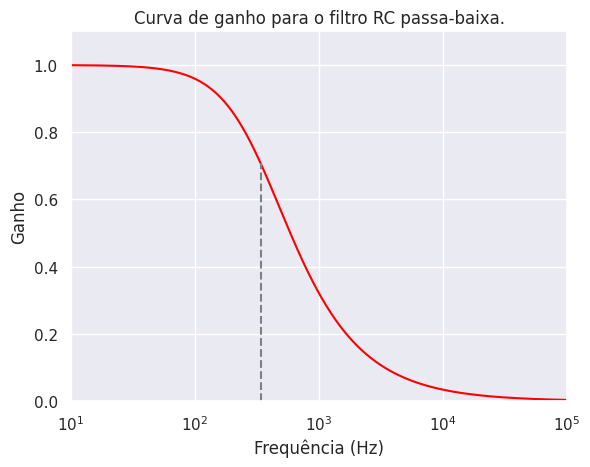

In [51]:
w = np.logspace(1, 5, 1000)

plt.title('Curva de ganho para o filtro RC passa-baixa.')
sns.lineplot(x=w, y=gain(w, w0), color='red')
plt.vlines(x=w0, ymin=0, ymax=gain(w0, w0), color='gray', linestyles='dashed')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Ganho')
plt.xscale('log')
plt.xlim(1E1, 1E5)
plt.ylim(0,1.1)
plt.show()

## Simulação para ondas quadradas

### $f = 72 Hz$

In [127]:
freq	= 72
period	= 1 / freq

In [128]:
N = 1000
t = np.linspace(0, 3 * period, N)
dt = 3 * period / N

In [129]:
signal = np.zeros(N) + 1
for i in range(3): signal[(2*i+1)*(N//6):(2*i+2)*(N//6)] = np.zeros(N//6) - 1

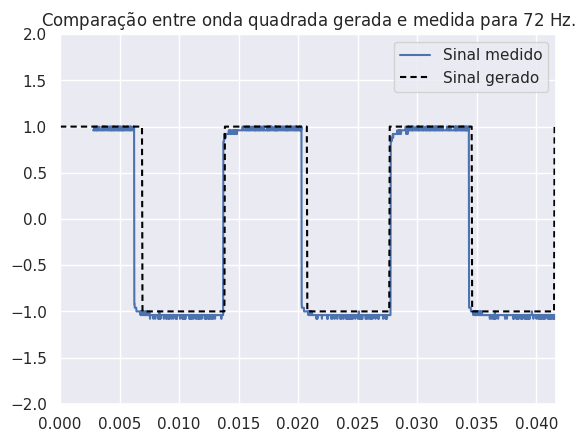

In [130]:
plt.title('Comparação entre onda quadrada gerada e medida para $72$ Hz.')
sns.lineplot(x=data[0] + 2 * period, y=data[1], label='Sinal medido')
sns.lineplot(x=t, y=signal, label='Sinal gerado', color='black', dashes=(3, 2))
plt.xlim(0, 3 * period)
plt.ylim(-2, 2)
plt.savefig('plots/freq_72_in.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [131]:
xf = fftfreq(N//3, dt)
yf = fft(signal[:N//3])

In [132]:
n_signal = np.zeros(N)
for i in range(100):
	n_signal += (6/N) * np.abs(yf[i]) * np.sin(2 * np.pi * xf[i] * t)

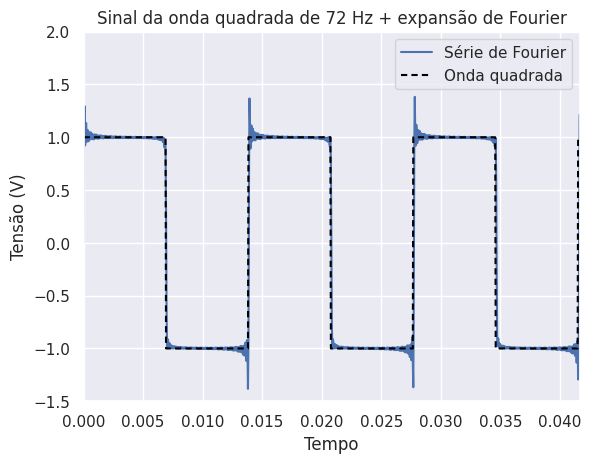

In [133]:
plt.title('Sinal da onda quadrada de 72 Hz + expansão de Fourier')
sns.lineplot(x=t, y=n_signal, label='Série de Fourier')
sns.lineplot(x=t, y=signal, label='Onda quadrada', color='black', dashes=(3,2))
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1.5, 2)
plt.legend()
plt.savefig('plots/freq_fourier_72.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [134]:
n_signal = np.zeros(N)
for i in range(100): n_signal += (6/N) * np.abs(yf[i]) * gain(xf[i], w0) * np.sin(2 * np.pi * xf[i] * t + phase(xf[i], w0))

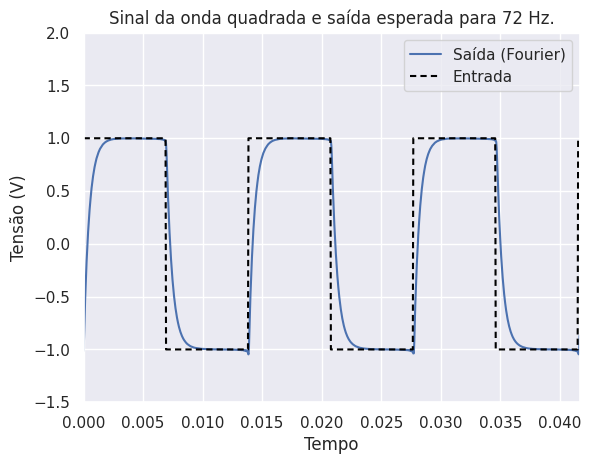

In [136]:
plt.title('Sinal da onda quadrada e saída esperada para 72 Hz.')
sns.lineplot(x=t, y=n_signal, label='Saída (Fourier)')
sns.lineplot(x=t, y=signal, label='Entrada', color='black', dashes=(3,2))
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1.5, 2)
plt.legend()
plt.savefig('plots/freq_fourier_72_out.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

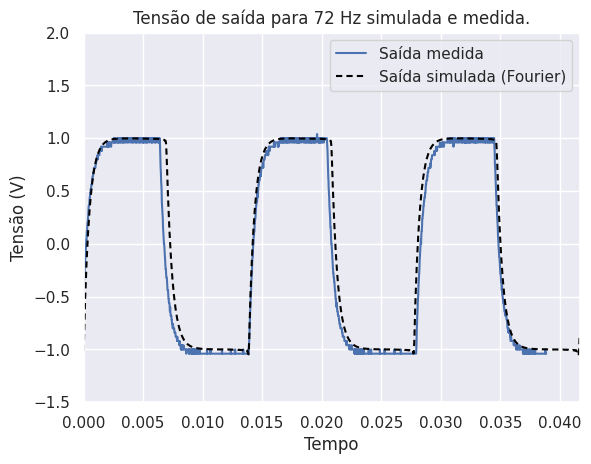

In [97]:
plt.title('Tensão de saída para 72 Hz simulada e medida.')
sns.lineplot(x=data[2]+period, y=data[3], label='Saída medida')
sns.lineplot(x=t, y=n_signal, color='black', dashes=(3, 2), label='Saída simulada (Fourier)')
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1.5, 2)
plt.legend()
plt.savefig('plots/freq_72_out.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

### $f = 360 Hz$

In [137]:
freq	= 360
period	= 1 / freq

In [138]:
N = 1000
t = np.linspace(0, 3 * period, N)
dt = 3 * period / N

In [139]:
signal = np.zeros(N) + 1
for i in range(3): signal[(2*i+1)*(N//6):(2*i+2)*(N//6)] = np.zeros(N//6) - 1

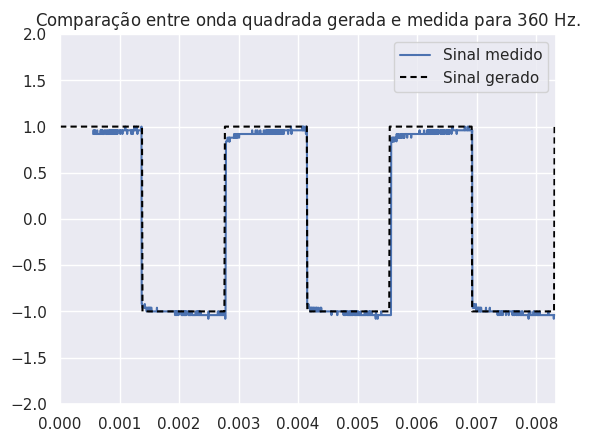

In [140]:
plt.title('Comparação entre onda quadrada gerada e medida para $360$ Hz.')
sns.lineplot(x=data[4] + 2 * period, y=data[5], label='Sinal medido')
sns.lineplot(x=t, y=signal, label='Sinal gerado', color='black', dashes=(3, 2))
plt.xlim(0, 3 * period)
plt.ylim(-2, 2)
plt.savefig('plots/freq_360_in.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [141]:
xf = fftfreq(N//3, dt)
yf = fft(signal[:N//3])

In [142]:
n_signal = np.zeros(N)
for i in range(100):
	n_signal += (6/N) * np.abs(yf[i]) * np.sin(2 * np.pi * xf[i] * t)

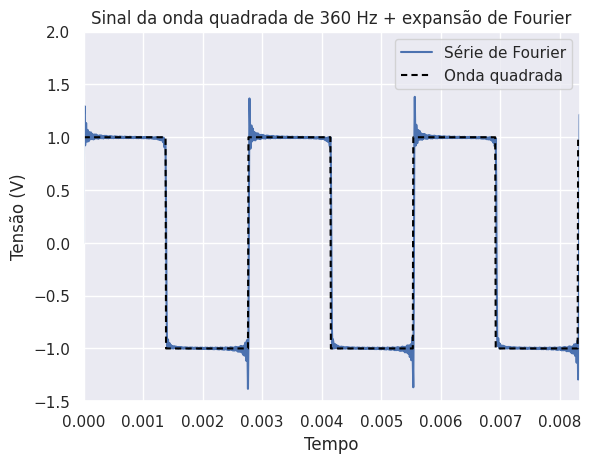

In [143]:
plt.title('Sinal da onda quadrada de 360 Hz + expansão de Fourier')
sns.lineplot(x=t, y=n_signal, label='Série de Fourier')
sns.lineplot(x=t, y=signal, label='Onda quadrada', color='black', dashes=(3,2))
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1.5, 2)
plt.legend()
plt.savefig('plots/freq_fourier_360.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [144]:
n_signal = np.zeros(N)
for i in range(100): n_signal += (6/N) * np.abs(yf[i]) * gain(xf[i], w0) * np.sin(2 * np.pi * xf[i] * t + phase(xf[i], w0))

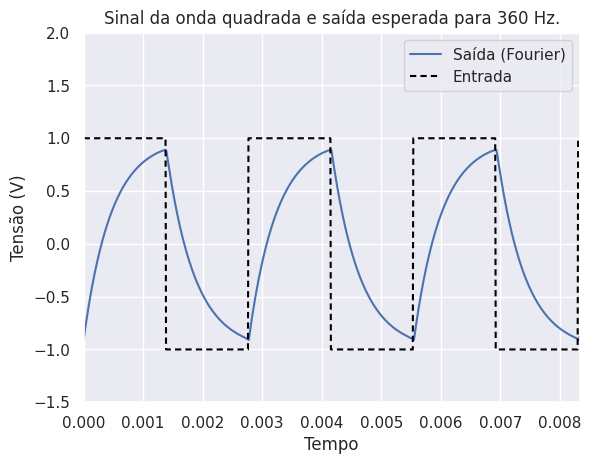

In [145]:
plt.title('Sinal da onda quadrada e saída esperada para 360 Hz.')
sns.lineplot(x=t, y=n_signal, label='Saída (Fourier)')
sns.lineplot(x=t, y=signal, label='Entrada', color='black', dashes=(3, 2))
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1.5, 2)
plt.legend()
plt.savefig('plots/freq_fourier_360_out.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

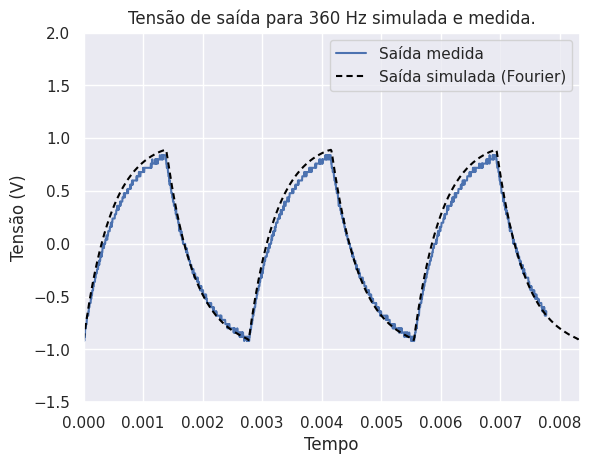

In [146]:
plt.title('Tensão de saída para 360 Hz simulada e medida.')
sns.lineplot(x=data[6]+period, y=data[7], label='Saída medida')
sns.lineplot(x=t, y=n_signal, color='black', dashes=(3, 2), label='Saída simulada (Fourier)')
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1.5, 2)
plt.legend()
plt.savefig('plots/freq_360_out.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

### $f = 7.2 kHz$

In [147]:
freq	= 7.2E3
period	= 1 / freq

In [148]:
N = 1000
t = np.linspace(0, 3 * period, N)
dt = 3 * period / N

In [149]:
signal = np.zeros(N) + 1
for i in range(3): signal[(2*i+1)*(N//6):(2*i+2)*(N//6)] = np.zeros(N//6) - 1

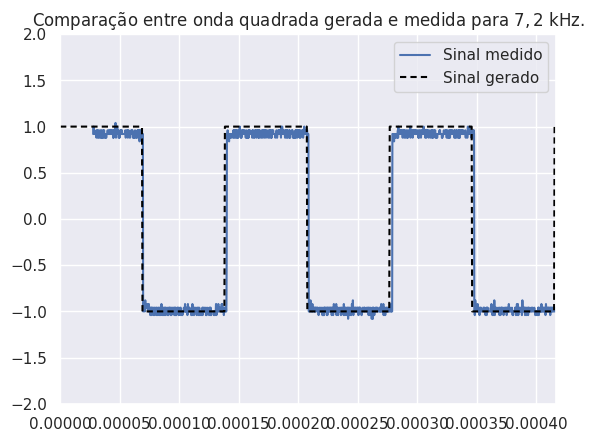

In [151]:
plt.title('Comparação entre onda quadrada gerada e medida para $7,2$ kHz.')
sns.lineplot(x=data[8] + 2 * period, y=data[9], label='Sinal medido')
sns.lineplot(x=t, y=signal, label='Sinal gerado', color='black', dashes=(3, 2))
plt.ylim(-2, 2)
plt.xlim(0, 3 * period)
plt.savefig('plots/freq_72k_in.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [152]:
xf = fftfreq(N//3, dt)
yf = fft(signal[:N//3])

In [153]:
n_signal = np.zeros(N)
for i in range(100):
	n_signal += (6/N) * np.abs(yf[i]) * np.sin(2 * np.pi * xf[i] * t)

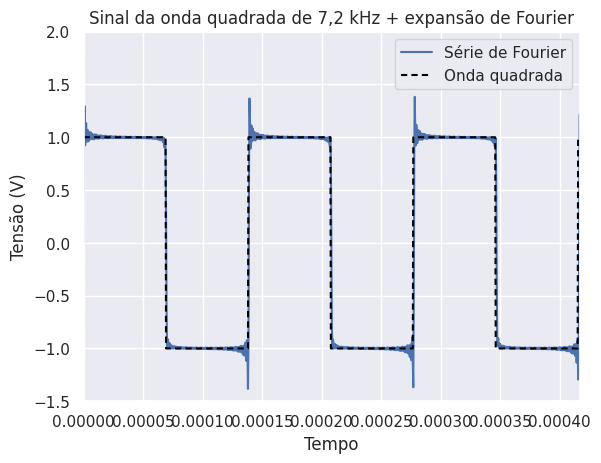

In [154]:
plt.title('Sinal da onda quadrada de 7,2 kHz + expansão de Fourier')
sns.lineplot(x=t, y=n_signal, label='Série de Fourier')
sns.lineplot(x=t, y=signal, label='Onda quadrada', color='black', dashes=(3,2))
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1.5, 2)
plt.legend()
plt.savefig('plots/freq_fourier_72k.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [155]:
n_signal = np.zeros(N)
for i in range(100): n_signal += (6/N) * np.abs(yf[i]) * gain(xf[i], w0) * np.sin(2 * np.pi * xf[i] * t + phase(xf[i], w0))

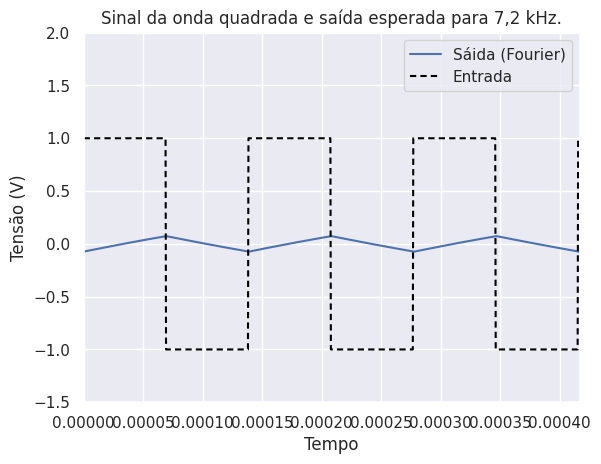

In [156]:
plt.title('Sinal da onda quadrada e saída esperada para 7,2 kHz.')
sns.lineplot(x=t, y=n_signal, label='Sáida (Fourier)')
sns.lineplot(x=t, y=signal, label='Entrada', color='black', dashes=(3,2))
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1.5, 2)
plt.legend()
plt.savefig('plots/freq_fourier_72k_out.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

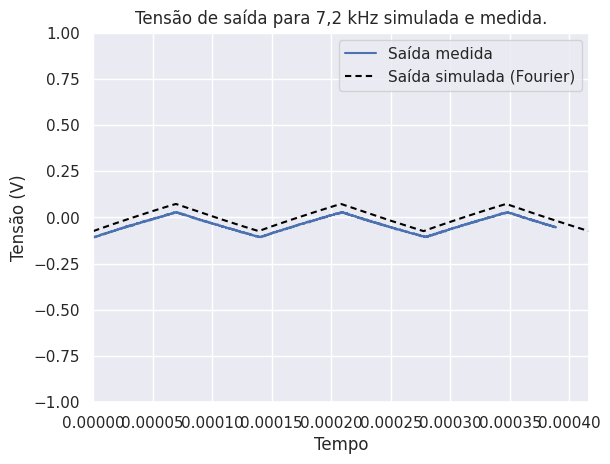

In [157]:
plt.title('Tensão de saída para 7,2 kHz simulada e medida.')
sns.lineplot(x=data[10]+period, y=data[11], label='Saída medida')
sns.lineplot(x=t, y=n_signal, color='black', dashes=(3, 2), label='Saída simulada (Fourier)')
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1, 1)
plt.legend()
plt.savefig('plots/freq_72k_out.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()